In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

### DECISION TREES CLASSIFICATION

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)

In [18]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [20]:
predictions = clf.predict(X_test)
predictions

array([2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 0])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  7]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['setosa', 'versicolor', 'virginica']))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        12
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [30]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
petal width (cm),0.552687
petal length (cm),0.411845
sepal width (cm),0.035468
sepal length (cm),0.000000


<Axes: >

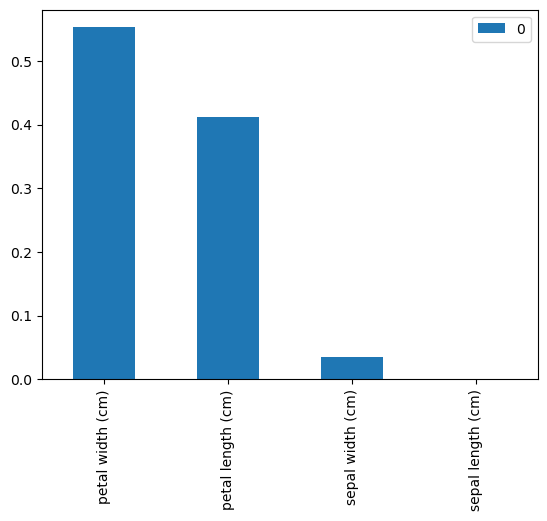

In [34]:
feature_importance.head(10).plot(kind='bar')

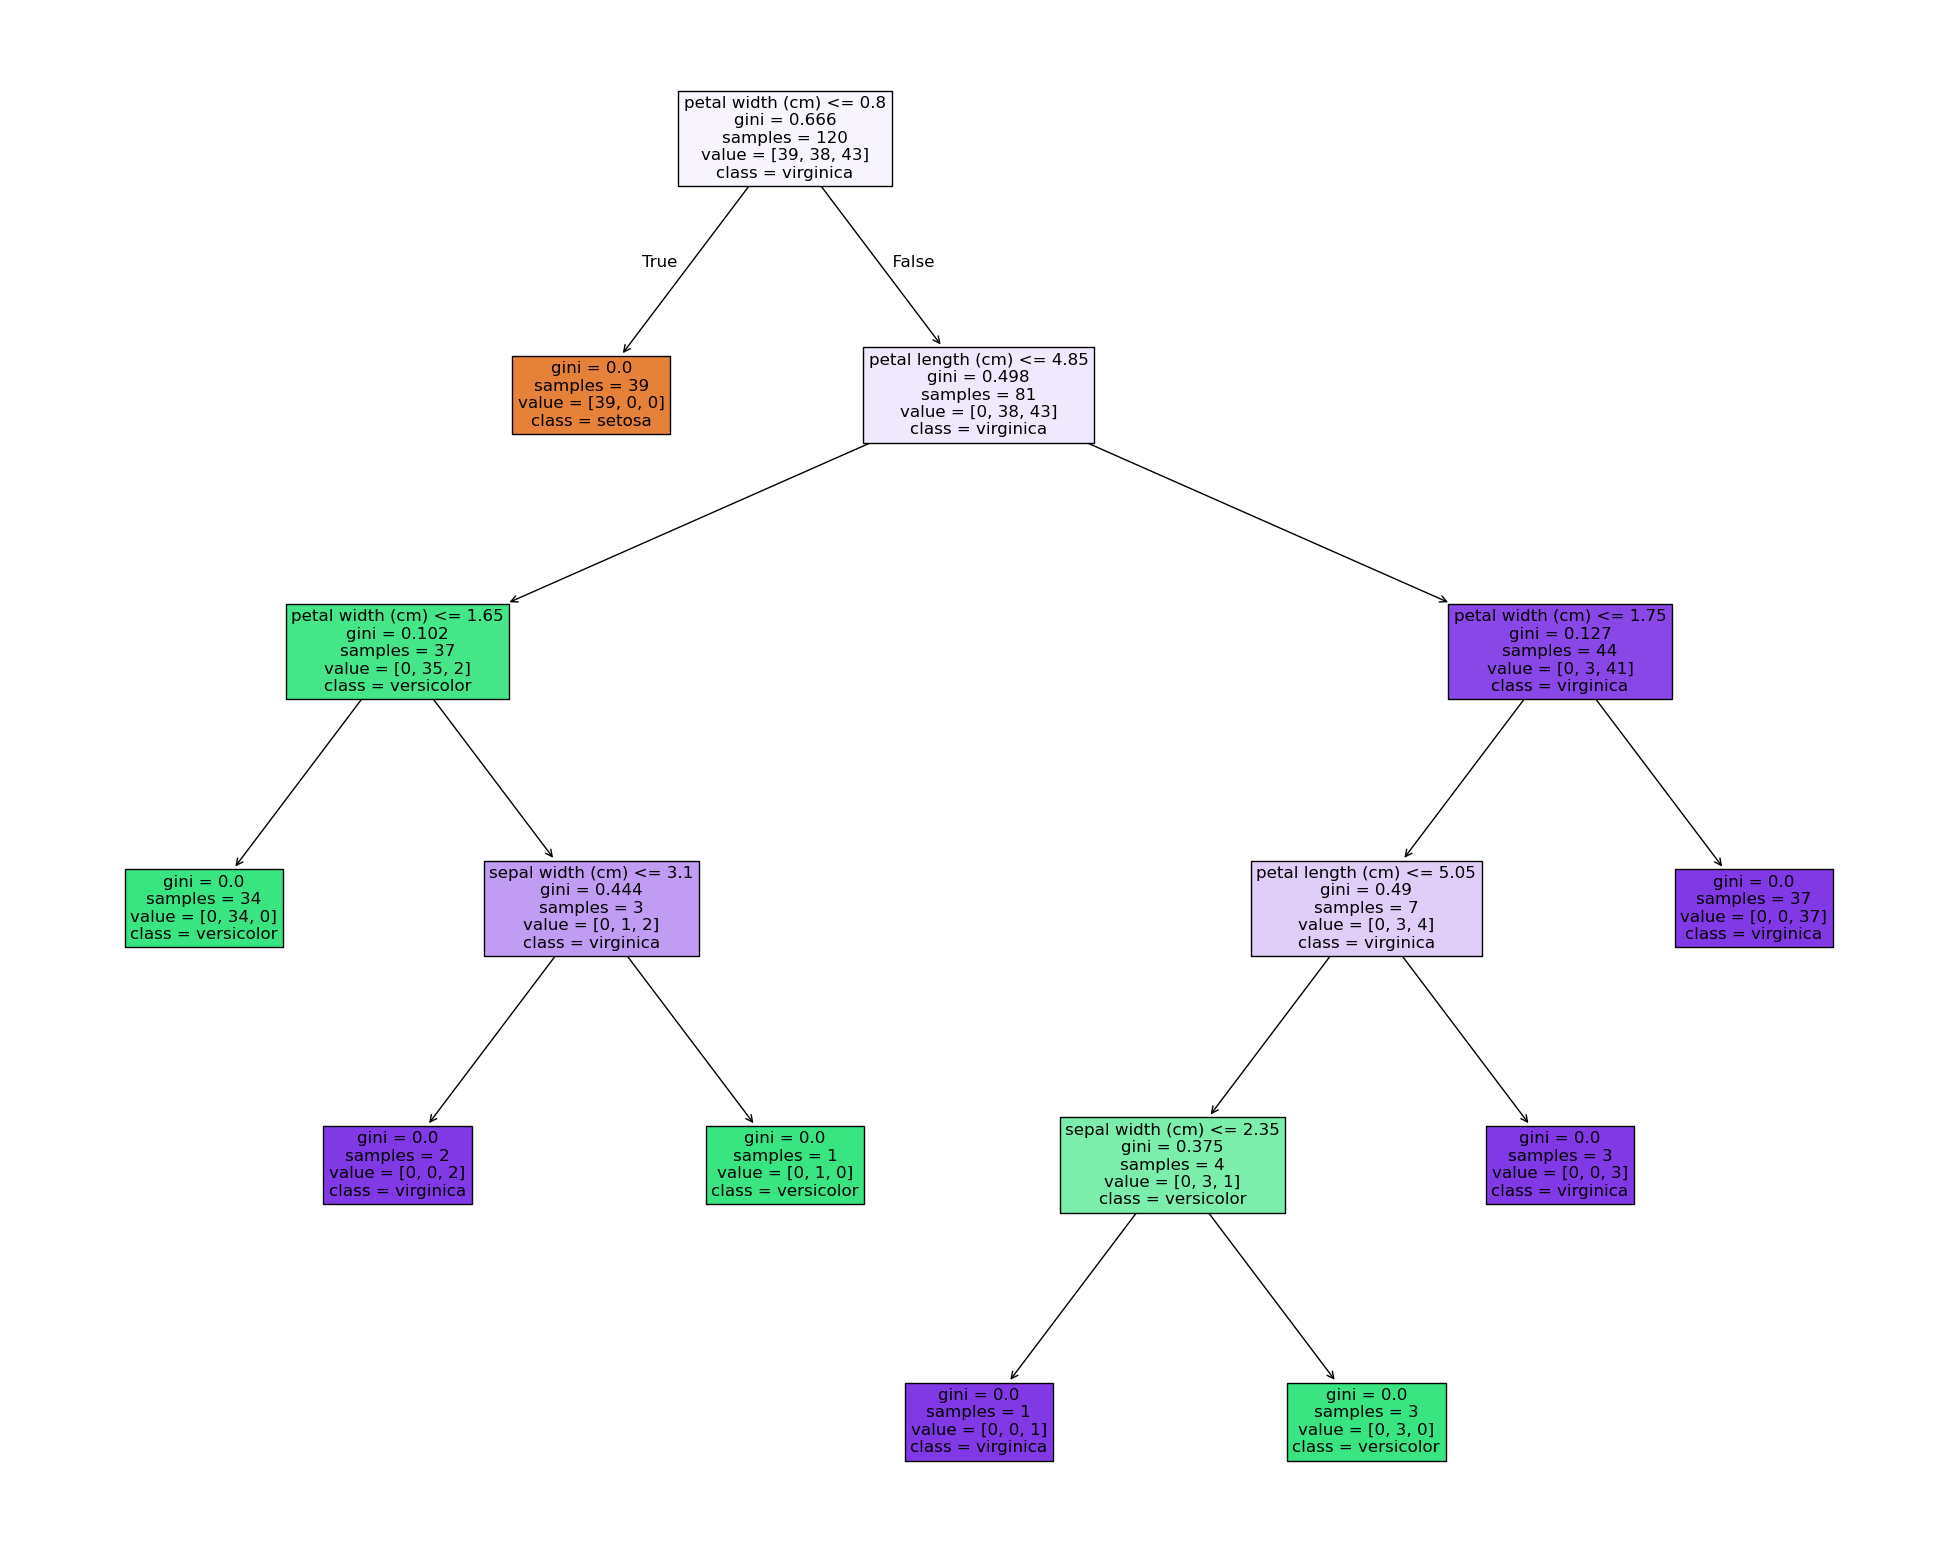

In [40]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,
                 feature_names=feature_names,
                 class_names={0:'setosa', 1:'versicolor', 2:'virginica'},
                 filled=True,
                fontsize=12)

### RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
model.score(X_test,y_test)

0.9666666666666667

In [48]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9666666666666667

In [50]:
predictions = model.predict(X_test)
predictions

array([2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 0])

In [52]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='weighted')

0.9708333333333333

In [54]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='weighted')

0.9666666666666667

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        12
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

